In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import RNNTrainer,GRURegressor

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
from model_history import ModelHistory

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [14]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 
# 0.003 * downsample_step = шаг данных в секундах
# output size количество выходных данных для 1 примера
# Подготовка данных
X, y, df = PD.many_to_many(
    window_size=window_size,
    num_features=num_features,
    downsample_step=downsample_step,
    target_window_size=target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([14407, 10, 9]),
 torch.Size([7097, 10, 9]),
 torch.Size([14407, 1]),
 torch.Size([7097, 1]))

In [3]:
model = GRURegressor( 
    input_size = X_train.shape[2],
    hidden_size=64, 
    output_size=y_train.shape[1], 
    num_layers=1,
    device = device)

trainer = RNNTrainer(
    model=model,
    learning_rate=0.001,
    device= device
)


In [4]:
#возможность загрузитиь параметры в модель
# model.load_state_dict(torch.load('up_tree_weight.pth'))
# model = model.to(device)
#возможность сохранить параметры модели
#torch.save(model.state_dict(), 'Quantum_weight3.pth')

In [5]:

history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=64,
    epochs=200,
    loss_tube=5
)

Epoch 10
Main: 1.883591, MAPE: 0.661970
Test - MAPE: 0.650522, Tube: 0.010427
Epoch 100
Main: 1.780612, MAPE: 0.622826
Test - MAPE: 0.623295, Tube: 0.012681
Epoch 200
Main: 1.781388, MAPE: 0.623107
Test - MAPE: 0.623295, Tube: 0.012681


In [ ]:
#model.load_state_dict(torch.load('best_model_weights.pth'))

In [6]:
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'GRU')

In [7]:
LV = LossVisualizer(history)

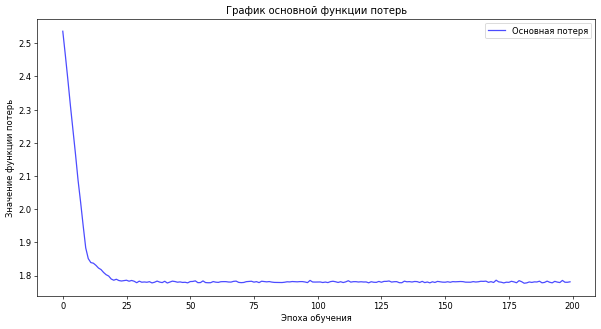

In [8]:
LV.show_training_loss()

In [9]:
a = "AAdAdd"
a.lower()

'aadadd'

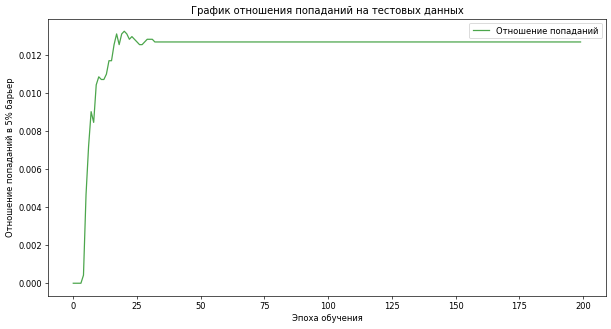

In [10]:
LV.show_test_tube()

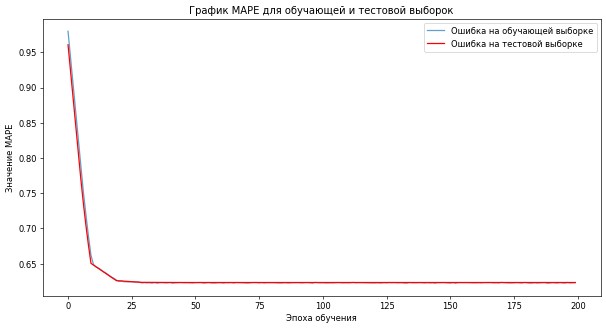

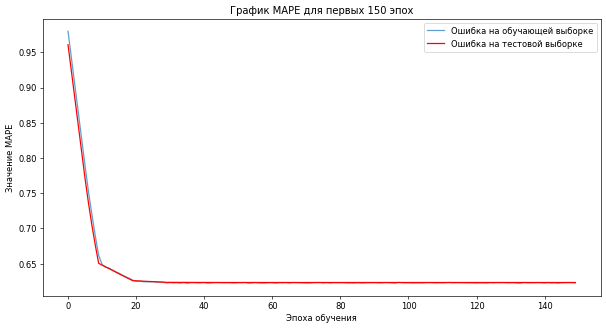

In [11]:
LV.show_mape()

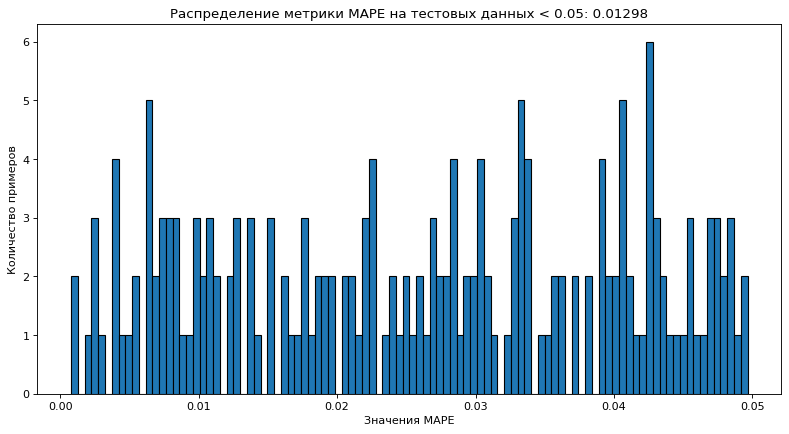

Процент значений MAPE < 0.05: 0.01298


In [12]:
LV.histogram_mape(model,X_train,y_train,limit_percel = 5)

Количество записей: 5334


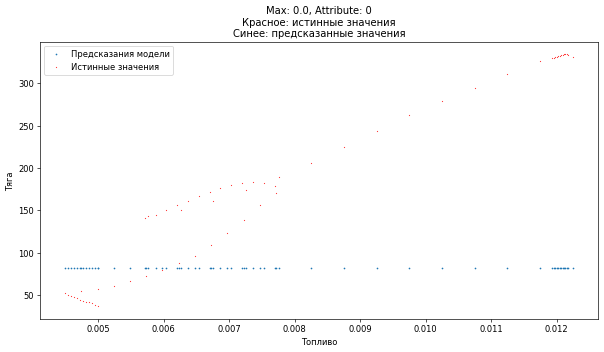

Количество записей: 5334


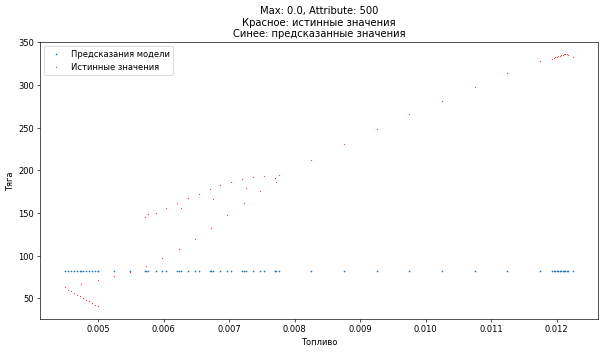

Количество записей: 5334


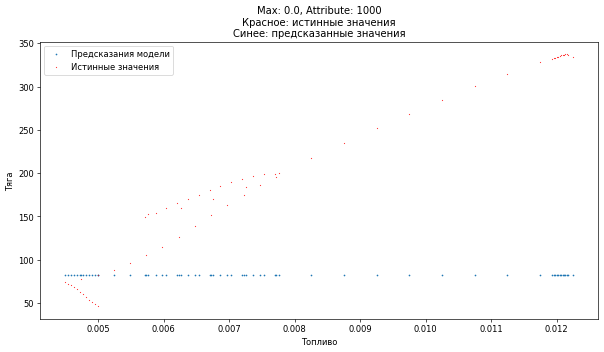

Количество записей: 5334


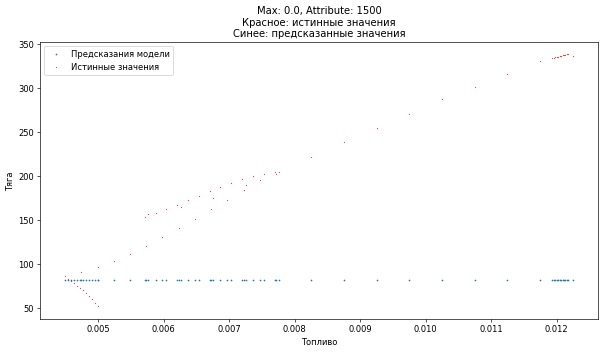

Количество записей: 5334


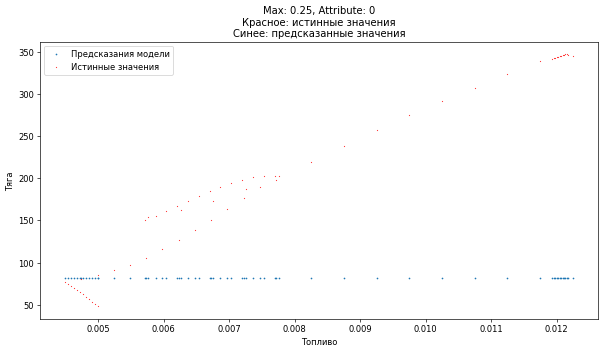

Количество записей: 5334


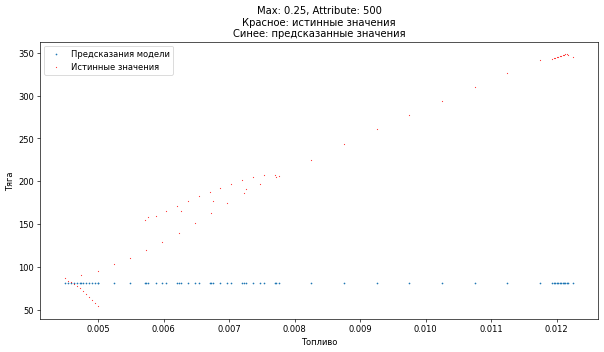

Количество записей: 5334


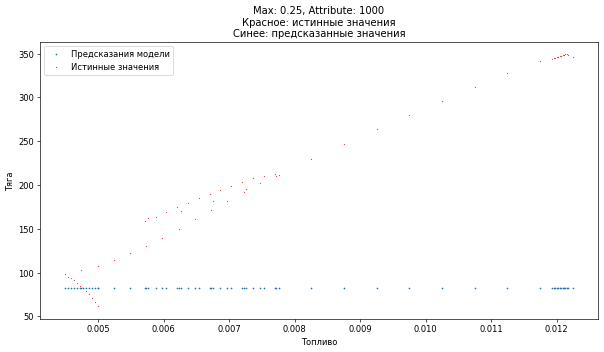

Количество записей: 5334


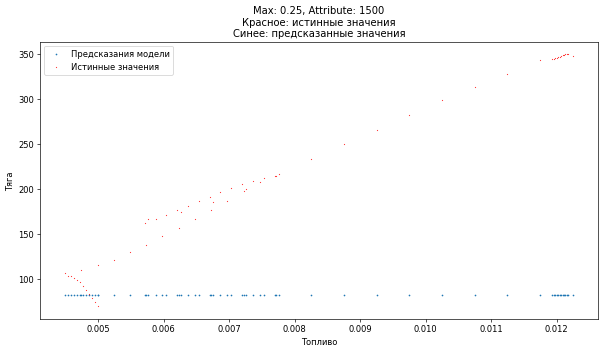

Количество записей: 5334


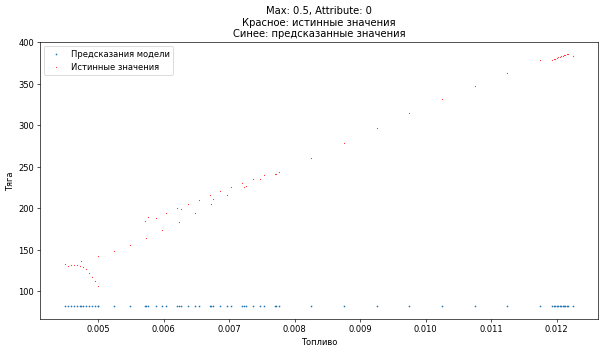

Количество записей: 5334


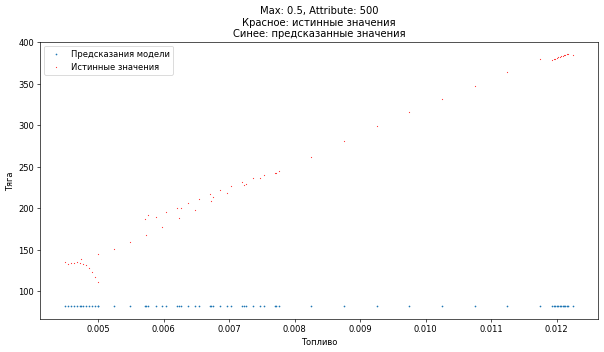

Количество записей: 5334


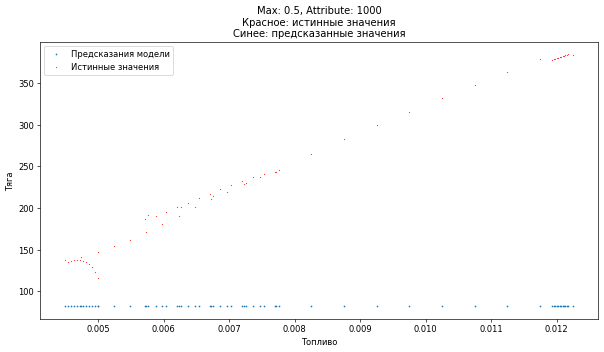

Количество записей: 5334


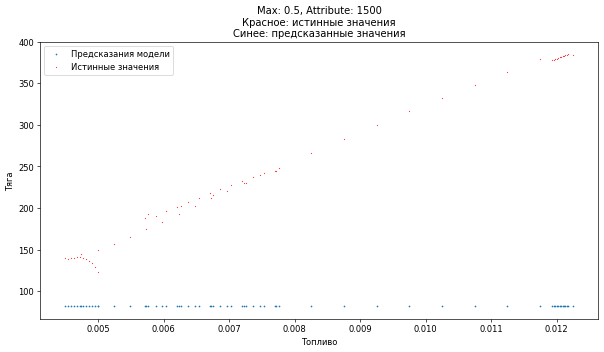

Количество записей: 5334


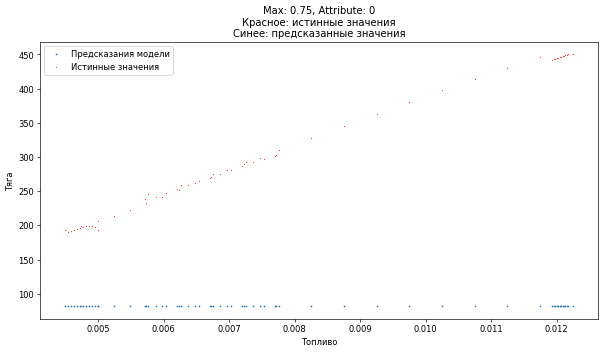

Количество записей: 5334


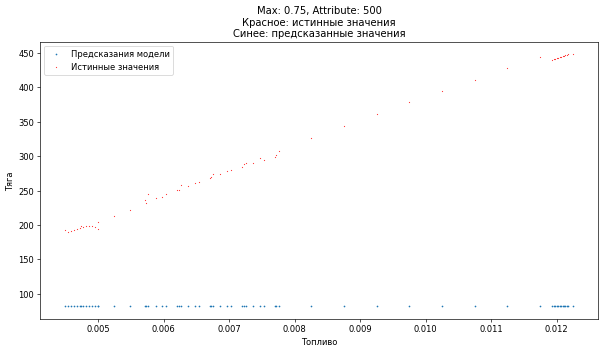

Количество записей: 5334


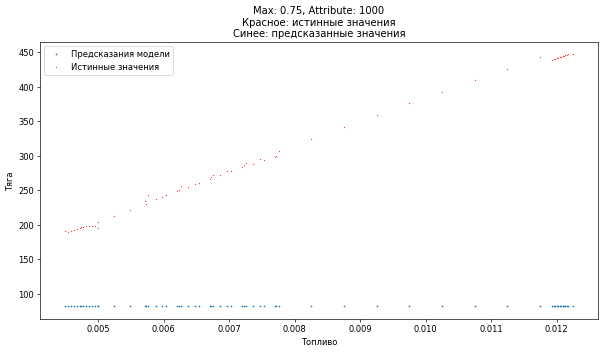

Количество записей: 5334


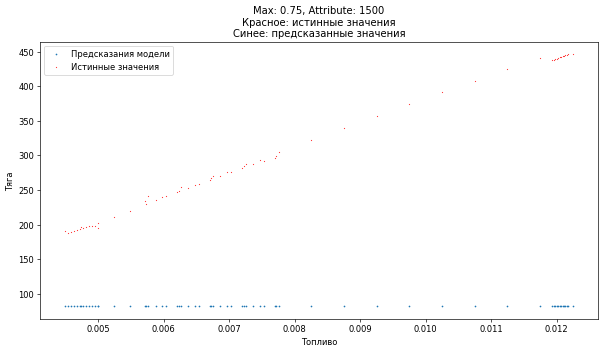

Количество записей: 5334


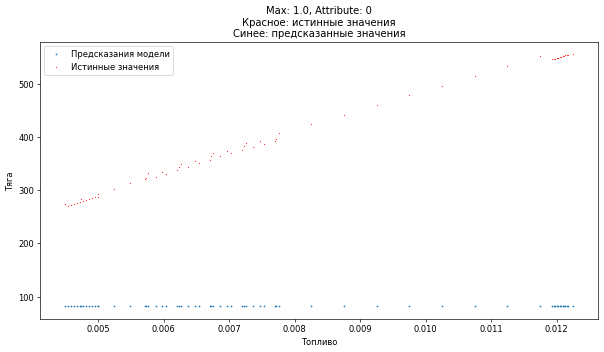

Количество записей: 5334


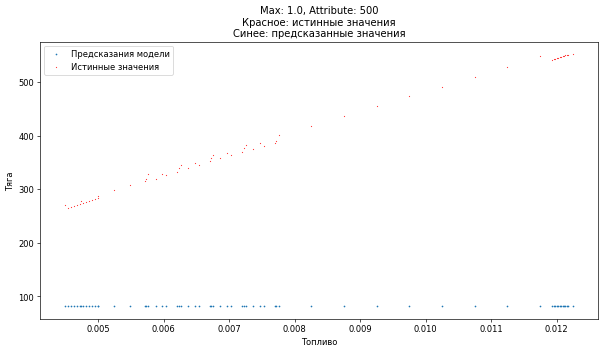

Количество записей: 5334


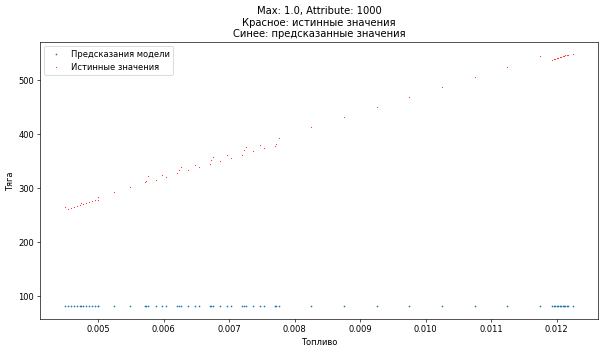

Количество записей: 5334


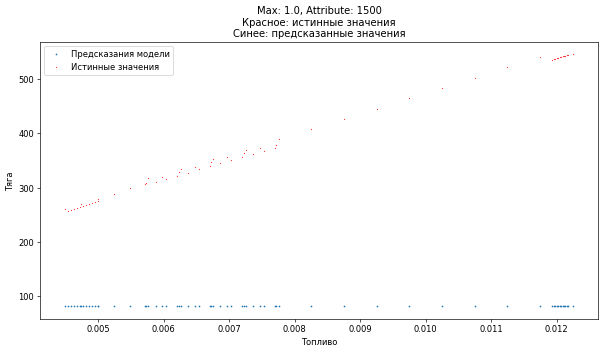

In [15]:
LV.show_predictions_rnn(model,df,pd_params,keras = False,device=device)